In [1]:
#importing the libs:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data:
df=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv')
df.shape

(150, 6)

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True) #since it's just the index
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#Get the frequency of the output categories and visualize it 
df.Species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

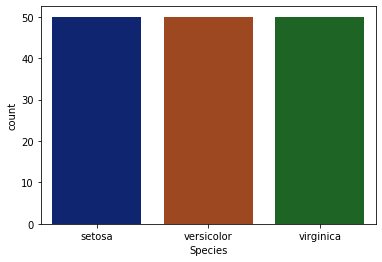

In [5]:
palette=sns.color_palette('dark') #color palette object
sns.set_palette(palette) #to set colors
sns.countplot(x='Species',data=df)

In [6]:
#splitting the data to apply the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Species',axis=1),df.Species,test_size=0.3,
                                               random_state=1)

In [7]:
#Apply the Decision Tree Algorithm and Visualize the Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree=DecisionTreeClassifier(criterion='entropy')

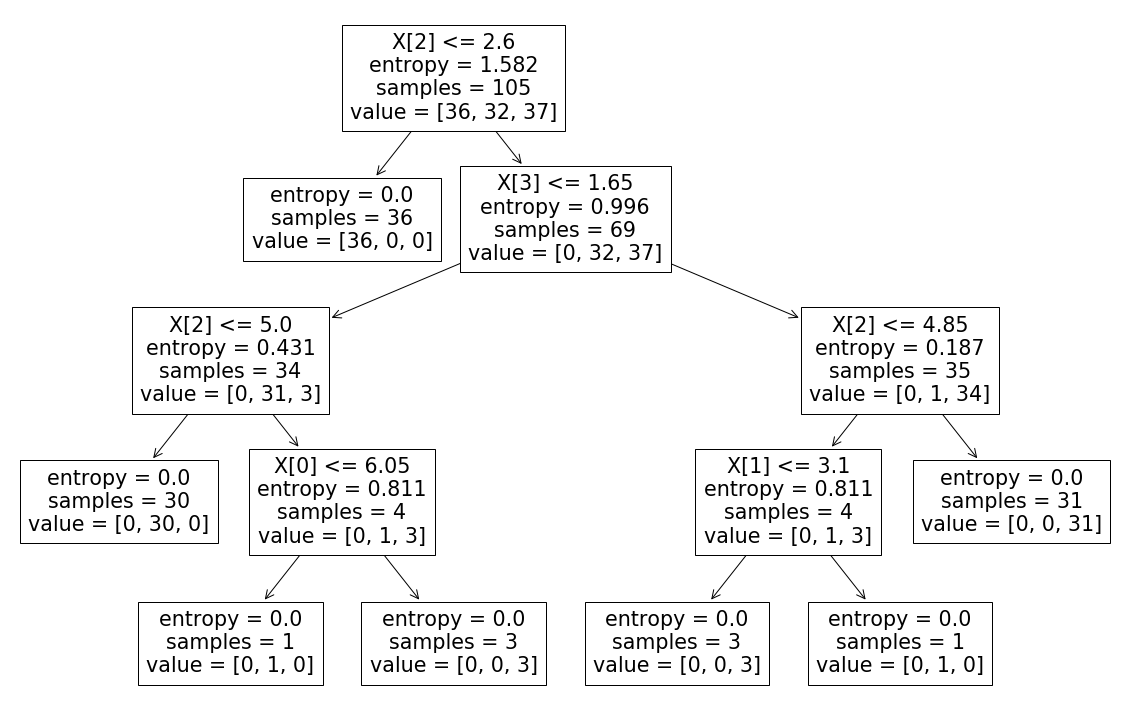

In [8]:
#training the data:
dtree.fit(X_train,y_train)
#Visualizing the tree:
plt.figure(figsize=(20,13))
plot_tree(dtree)
plt.show()

In [9]:
#Compare the performance of training scores and testing scores and 
#check whether the model is overfitting to the data
#predicting on train data:
y_train_pred=dtree.predict(X_train)
#predicting on test data:
y_test_pred=dtree.predict(X_test)
#checking the metrics:
from sklearn.metrics import classification_report
print('PERFORMANCE ON TRAINING DATA:')
print(classification_report(y_train,y_train_pred))
print('PERFORMANCE ON TEST DATA:')
print(classification_report(y_test,y_test_pred))

PERFORMANCE ON TRAINING DATA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        36
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

PERFORMANCE ON TEST DATA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#### here it can be observed that the training accuracy is 100% but the testing accuracy is 96%
#### therefore, there is no overfit or underfit
#### but lets try tuning the hyper parameters using Grid search method to achieve 100% accuracy

In [10]:
#create a new decision tree object
from sklearn.tree import DecisionTreeClassifier
dtree_hype=DecisionTreeClassifier()
grid_params={
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': range(1,20),
    'min_samples_leaf':range(1,10)
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtree_hype,param_grid=grid_params)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [11]:
#Building the model with these params
final_model=DecisionTreeClassifier(criterion='entropy',
                                   max_depth=6,
                                   min_samples_leaf=3,
                                   splitter='random')
final_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [12]:
#predicting on test data:
final_y_test_pred=final_model.predict(X_test)
#Classification report for the final model
print(classification_report(final_y_test_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.89      0.89        18
   virginica       0.85      0.85      0.85        13

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

